Training samples: 792, Testing samples: 198
Starting training...
Epoch 1/2000, Loss: 0.232565
Epoch 200/2000, Loss: 0.045152
Epoch 400/2000, Loss: 0.039404
Epoch 600/2000, Loss: 0.038299
Epoch 800/2000, Loss: 0.038197
Epoch 1000/2000, Loss: 0.038075
Epoch 1200/2000, Loss: 0.037987
Epoch 1400/2000, Loss: 0.037936
Epoch 1600/2000, Loss: 0.037907
Epoch 1800/2000, Loss: 0.037878
Epoch 2000/2000, Loss: 0.037842
Training completed.


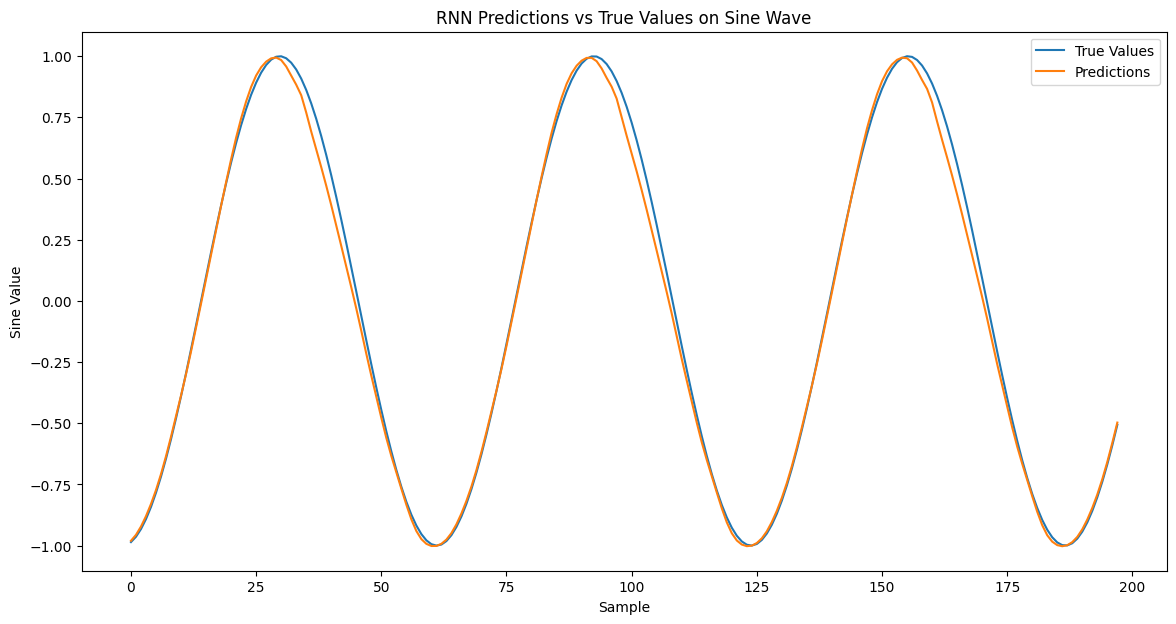

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12)

class RNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate

        self.W_xh = np.random.randn(hidden_size, input_size) * 0.01  # Input to hidden
        self.W_hh = np.random.randn(hidden_size, hidden_size) * 0.01  # Hidden to hidden
        self.W_hy = np.random.randn(output_size, hidden_size) * 0.01  # Hidden to output

        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))

    def forward(self, inputs):

        h_prev = np.zeros((self.hidden_size, 1))
        hidden_states = []
        outputs = []

        for x in inputs:
            h_current = np.tanh(np.dot(self.W_xh, x) + np.dot(self.W_hh, h_prev) + self.b_h)
            hidden_states.append(h_current)

            y = np.dot(self.W_hy, h_current) + self.b_y
            outputs.append(y)

            h_prev = h_current

        return outputs, hidden_states

    def compute_loss(self, outputs, targets):
        loss = 0
        for y, t in zip(outputs, targets):
            loss += np.sum((y - t) ** 2)
        return loss / len(outputs)

    def backward(self, inputs, targets, outputs, hidden_states):
        dW_xh = np.zeros_like(self.W_xh)
        dW_hh = np.zeros_like(self.W_hh)
        dW_hy = np.zeros_like(self.W_hy)
        db_h = np.zeros_like(self.b_h)
        db_y = np.zeros_like(self.b_y)

        dh_next = np.zeros((self.hidden_size, 1))

        for t in reversed(range(len(inputs))):
            dy = outputs[t] - targets[t]
            dW_hy += np.dot(dy, hidden_states[t].T)
            db_y += dy

            dh = np.dot(self.W_hy.T, dy) + dh_next
            dh_raw = (1 - hidden_states[t] ** 2) * dh

            db_h += dh_raw
            dW_xh += np.dot(dh_raw, inputs[t].T)
            if t > 0:
                dW_hh += np.dot(dh_raw, hidden_states[t-1].T)
            else:
                dW_hh += np.dot(dh_raw, np.zeros_like(hidden_states[t]).T)

            dh_next = np.dot(self.W_hh.T, dh_raw)

        # Clip gradients to prevent exploding gradients
        for d in [dW_xh, dW_hh, dW_hy, db_h, db_y]:
            np.clip(d, -1, 1, out=d)

        self.W_xh -= self.learning_rate * dW_xh
        self.W_hh -= self.learning_rate * dW_hh
        self.W_hy -= self.learning_rate * dW_hy
        self.b_h -= self.learning_rate * db_h
        self.b_y -= self.learning_rate * db_y

    def train(self, inputs, targets, epochs=1000):
        for epoch in range(epochs):
            total_loss = 0
            for seq, target in zip(inputs, targets):
                outputs, hidden_states = self.forward(seq)
                loss = self.compute_loss(outputs, [target]*len(seq))
                self.backward(seq, [target]*len(seq), outputs, hidden_states)
                total_loss += loss
            avg_loss = total_loss / len(inputs)

            if (epoch + 1) % (epochs // 10) == 0 or epoch == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}')

    def predict(self, inputs):
        outputs, _ = self.forward(inputs)
        return outputs

# Generate a sine wave
def generate_sine_wave(seq_length, total_samples):
    x = np.linspace(0, 100, total_samples)
    y = np.sin(x)

    X = []
    Y = []
    for i in range(total_samples - seq_length):
        seq_in = y[i:i+seq_length]
        seq_out = y[i+seq_length]
        X.append([np.array([[val]]) for val in seq_in])
        Y.append(np.array([[seq_out]]))
    return X, Y

SEQ_LENGTH = 10
TOTAL_SAMPLES = 1000

X, Y = generate_sine_wave(SEQ_LENGTH, TOTAL_SAMPLES)

split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')

INPUT_SIZE = 1
HIDDEN_SIZE = 16
OUTPUT_SIZE = 1
LEARNING_RATE = 0.005
EPOCHS = 2000

rnn = RNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, learning_rate=LEARNING_RATE)

print("Starting training...")
rnn.train(X_train, Y_train, epochs=EPOCHS)
print("Training completed.")

predictions = []
for seq in X_test:
    output = rnn.predict(seq)[-1]
    predictions.append(output.item())

true_values = [y.item() for y in Y_test]

plt.figure(figsize=(14, 7))
plt.plot(true_values, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('RNN Predictions vs True Values on Sine Wave')
plt.xlabel('Sample')
plt.ylabel('Sine Value')
plt.legend()
plt.show()


Training samples: 792, Testing samples: 198
Starting training...
Epoch 1/2000, Loss: 0.502988
Epoch 200/2000, Loss: 0.165259
Epoch 400/2000, Loss: 0.165130
Epoch 600/2000, Loss: 0.164964
Epoch 800/2000, Loss: 0.164869
Epoch 1000/2000, Loss: 0.164327
Epoch 1200/2000, Loss: 0.164074
Epoch 1400/2000, Loss: 0.138761
Epoch 1600/2000, Loss: 0.087145
Epoch 1800/2000, Loss: 0.061041
Epoch 2000/2000, Loss: 0.051744
Training completed.


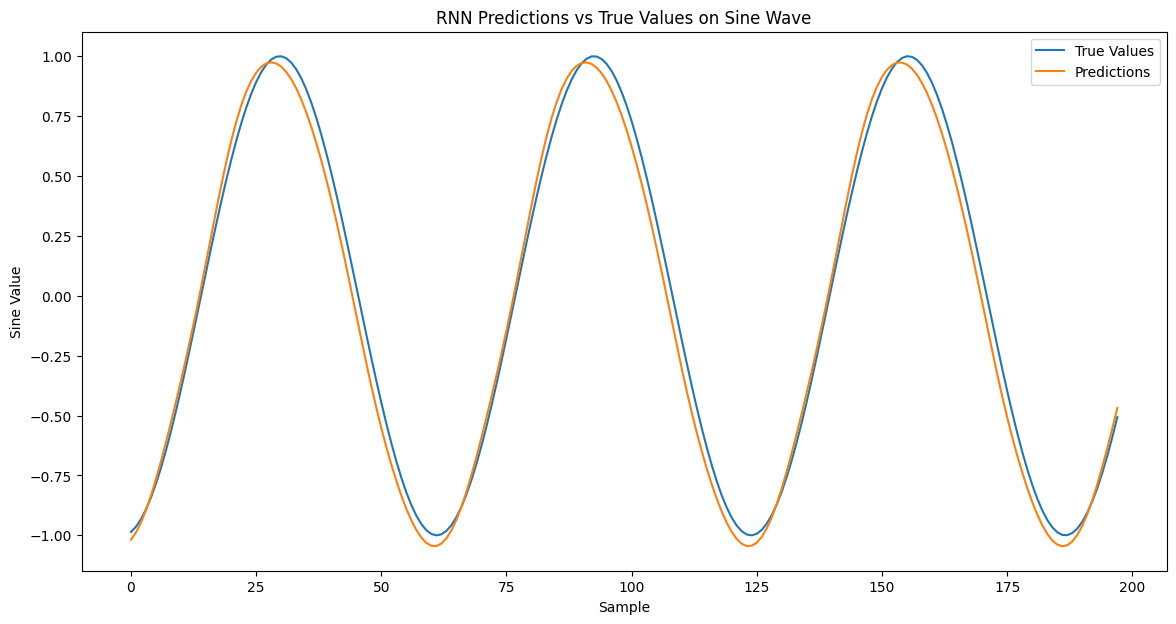

In [ ]:
SEQ_LENGTH = 10
TOTAL_SAMPLES = 1000

X, Y = generate_sine_wave(SEQ_LENGTH, TOTAL_SAMPLES)

split = int(0.8 * len(X))
X_train, Y_train = X[:split], Y[:split]
X_test, Y_test = X[split:], Y[split:]

print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')

INPUT_SIZE = 1
HIDDEN_SIZE = 32
OUTPUT_SIZE = 1
LEARNING_RATE = 0.0001
EPOCHS = 2000

rnn = RNN(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE, learning_rate=LEARNING_RATE)

print("Starting training...")
rnn.train(X_train, Y_train, epochs=EPOCHS)
print("Training completed.")

predictions = []
for seq in X_test:
    output = rnn.predict(seq)[-1]
    predictions.append(output.item())

true_values = [y.item() for y in Y_test]

plt.figure(figsize=(14, 7))
plt.plot(true_values, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('RNN Predictions vs True Values on Sine Wave')
plt.xlabel('Sample')
plt.ylabel('Sine Value')
plt.legend()
plt.show()